<a href="https://colab.research.google.com/github/magedyasse/Weather_Pred/blob/main/WeatherHistory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Analysis

# Importing Required Libraries

In [267]:

import pandas as pd
import numpy as np

#  Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#  Preprocessing & Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#  Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

#  Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#  Model Saving
import joblib

#  Date & Time Processing
from datetime import datetime


In [268]:
url = "https://raw.githubusercontent.com/martandsingh/datasets/master/weatherHistory.csv"
df = pd.read_csv(url)

# Exploring Data

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [270]:
r , c = df.shape
print(f"ROWs : {r} ,  Columns : {c} .")

ROWs : 96453 ,  Columns : 12 .


In [271]:
print(f"Number Of Missing Values : {df.isnull().sum().sum()}")

Number Of Missing Values : 517


In [272]:
print(f"Number Of Duplications : {df.duplicated().sum() }")

Number Of Duplications : 24


In [273]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [274]:
df[['Summary','Precip Type','Loud Cover']].nunique()

,0
Summary,27
Precip Type,2
Loud Cover,1


In [275]:
df['Summary'].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

In [276]:
df['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

# EDA – Exploratory Data Analysis

# Formatted Date

* Convert to datetime with pd.to_datetime().

* Use as index for time series analysis.

*  Extract features: year, month, day, hour, dayofweek.

In [277]:
df['Formatted Date'].sample(5)

,Formatted Date
31937,2009-03-29 18:00:00.000 +0200
45555,2011-12-19 03:00:00.000 +0100
40926,2010-05-01 07:00:00.000 +0200
53693,2012-08-23 05:00:00.000 +0200
6354,2006-05-29 19:00:00.000 +0200


In [278]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)

# time series analysis
df = df.set_index('Formatted Date')

# Extract features
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['Hour'] = df.index.hour


In [346]:
# heatmap_data = df.pivot_table(values='Temperature (C)',
#                               index='Hour',
#                               columns='Month',
#                               aggfunc='mean')

# plt.figure(figsize=(14,8))

# sns.heatmap(heatmap_data, annot=False, cmap="coolwarm", cbar_kws={'label': 'Temperature (C)'}, linewidths=0.5)

# plt.title("Enhanced Heatmap: Average Temperature by Hour and Month", fontsize=16)
# plt.xlabel("Month", fontsize=12)
# plt.ylabel("Hour of Day", fontsize=12)

# plt.hlines(y=6, xmin=0, xmax=12, colors='black', linestyles='dashed')
# plt.hlines(y=18, xmin=0, xmax=12, colors='black', linestyles='dashed')
# plt.text(12.2, 3, "Night", rotation=0, verticalalignment='center', fontsize=10)
# plt.text(12.2, 12, "Day", rotation=0, verticalalignment='center', fontsize=10)
# plt.text(12.2, 21, "Night", rotation=0, verticalalignment='center', fontsize=10)

# plt.show()

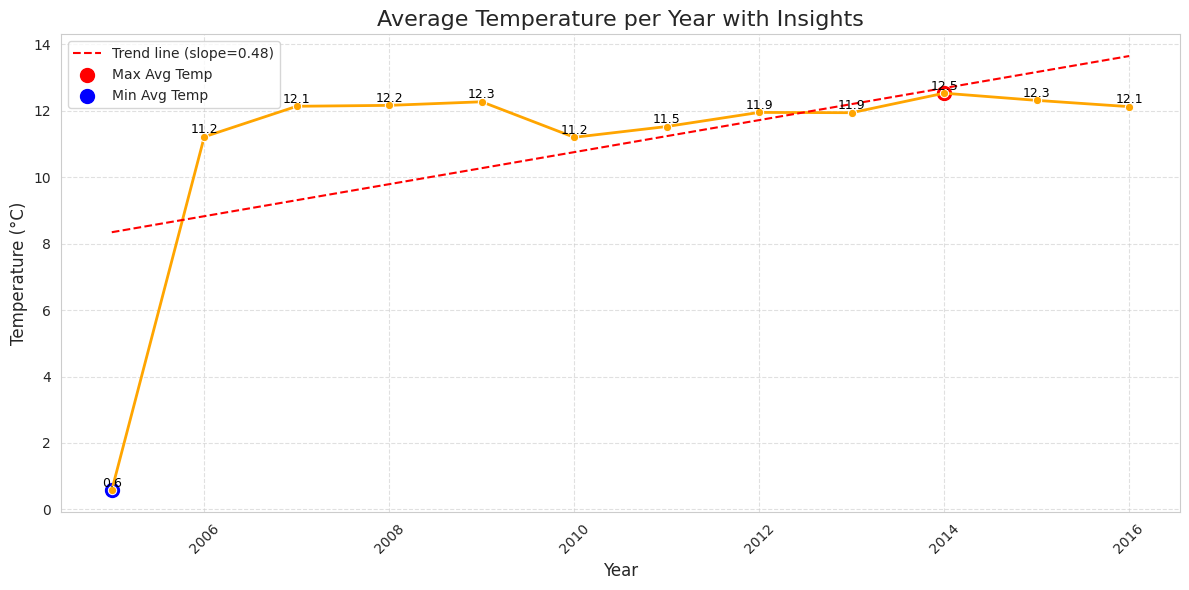

In [348]:
from scipy.stats import linregress

yearly_temp = df.groupby('Year')['Temperature (C)'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='Year', y='Temperature (C)', data=yearly_temp, marker='o', color='orange', linewidth=2)

for i, row in yearly_temp.iterrows():
    plt.text(row['Year'], row['Temperature (C)']+0.1, f"{row['Temperature (C)']:.1f}",
             horizontalalignment='center', fontsize=9, color='black')

slope, intercept, r_value, p_value, std_err = linregress(yearly_temp['Year'], yearly_temp['Temperature (C)'])
plt.plot(yearly_temp['Year'], intercept + slope*yearly_temp['Year'], 'r--', label=f'Trend line (slope={slope:.2f})')

max_temp = yearly_temp.loc[yearly_temp['Temperature (C)'].idxmax()]
min_temp = yearly_temp.loc[yearly_temp['Temperature (C)'].idxmin()]
plt.scatter(max_temp['Year'], max_temp['Temperature (C)'], color='red', s=100, label='Max Avg Temp')
plt.scatter(min_temp['Year'], min_temp['Temperature (C)'], color='blue', s=100, label='Min Avg Temp')

plt.title("Average Temperature per Year with Insights", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Temperature (°C)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

/tmp/ipython-input-2722013932.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Month'], y=df['Temperature (C)'], palette="viridis")


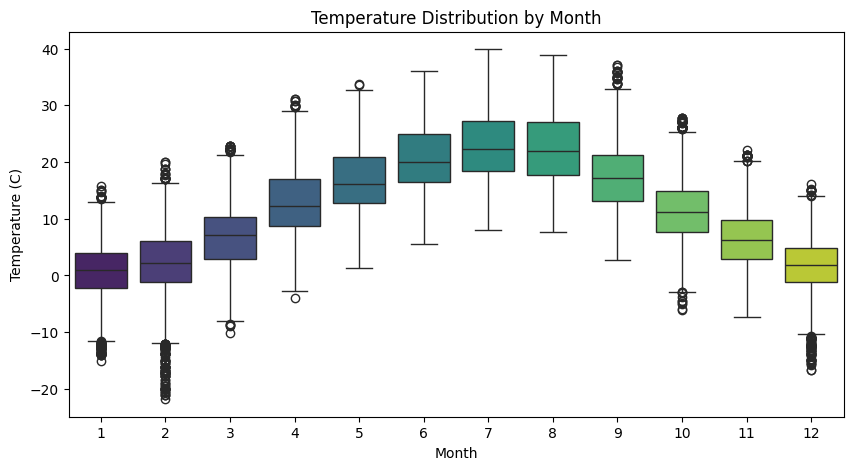

In [337]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Month'], y=df['Temperature (C)'], palette="viridis")
plt.title("Temperature Distribution by Month")
plt.xlabel("Month")
plt.ylabel("Temperature (C)")
plt.show()


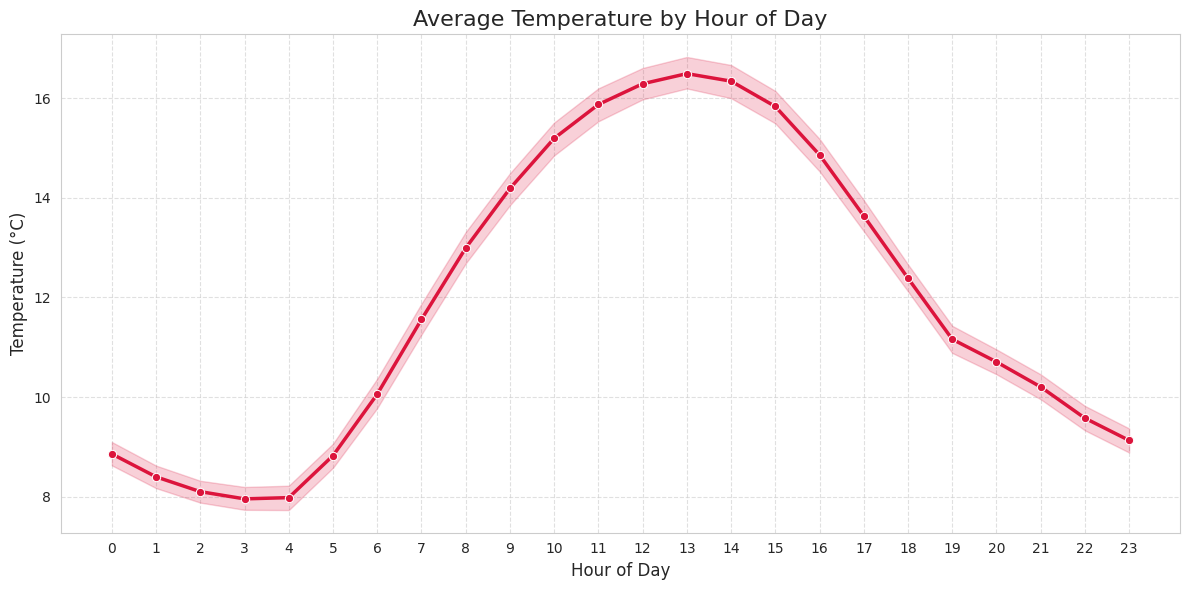

In [343]:
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.lineplot(
    x=df['Hour'],
    y=df['Temperature (C)'],
                   estimator='mean',
    color="crimson",
    marker="o",
    linewidth=2.5
)

plt.title("Average Temperature by Hour of Day", fontsize=16)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Temperature (°C)", fontsize=12)
plt.xticks(range(0,24))
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

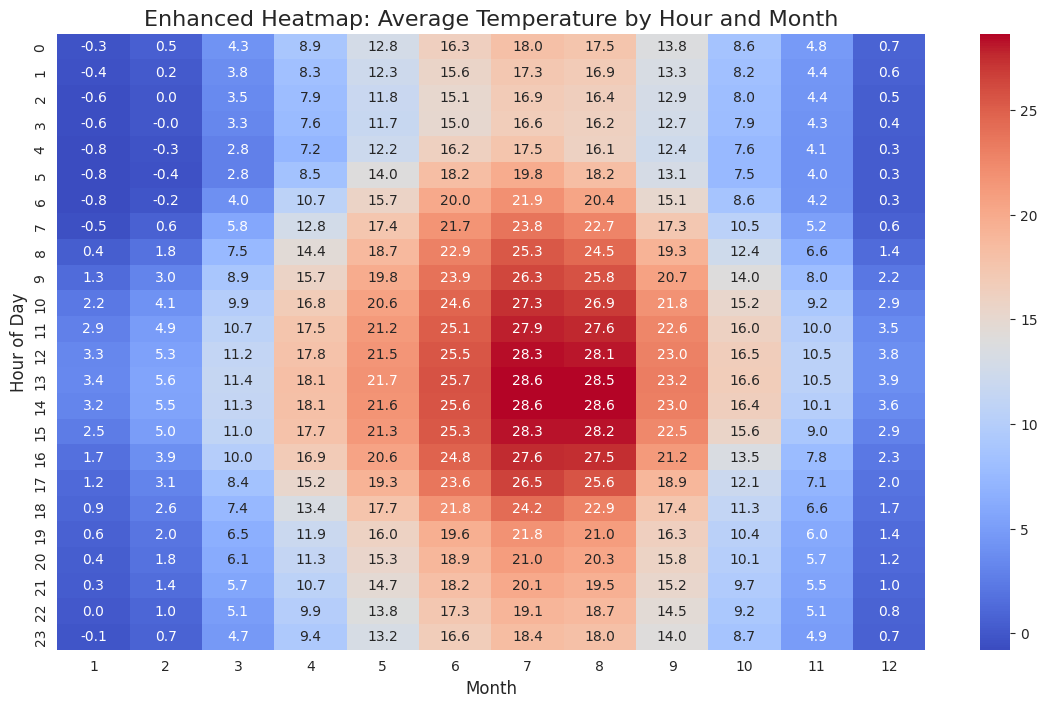

In [345]:
heatmap_data = df.pivot_table(values='Temperature (C)',
                              index='Hour',
                              columns='Month',
                              aggfunc='mean')

plt.figure(figsize=(14,8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Enhanced Heatmap: Average Temperature by Hour and Month", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Hour of Day", fontsize=12)
plt.show()

In [279]:
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year,Month,Day,Hour
Formatted Date,,,,,,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006,3,31,22
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006,3,31,23
2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006,4,1,0
2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006,4,1,1
2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006,4,1,2


# Summary

* Text column → needs encoding (Label Encoding or One-Hot).

* May contain many categories → group or simplify if needed.

In [280]:
df['Summary'].sample(5)

,Summary
Formatted Date,
2011-11-30 19:00:00+00:00,Foggy
2010-08-10 05:00:00+00:00,Clear
2011-05-29 02:00:00+00:00,Mostly Cloudy
2009-08-07 08:00:00+00:00,Partly Cloudy
2008-08-29 23:00:00+00:00,Partly Cloudy


In [281]:
df['Summary'].nunique()

27

In [282]:
df['Summary'].value_counts()

,count
Summary,
Partly Cloudy,31733
Mostly Cloudy,28094
Overcast,16597
Clear,10890
Foggy,7148
Breezy and Overcast,528
Breezy and Mostly Cloudy,516
Breezy and Partly Cloudy,386
Dry and Partly Cloudy,86


In [283]:
summary_temp = df.groupby('Summary')["Temperature (C)"].mean().sort_values(ascending=False)
print(summary_temp)

Summary
Dry                                    29.083660
Windy and Dry                          27.222222
Dry and Mostly Cloudy                  26.838492
Dry and Partly Cloudy                  26.605749
Humid and Partly Cloudy                21.568301
Humid and Overcast                     21.515079
Breezy and Dry                         21.111111
Humid and Mostly Cloudy                20.886389
Partly Cloudy                          16.024782
Mostly Cloudy                          12.629334
Breezy and Partly Cloudy               12.492761
Clear                                  11.925109
Windy and Foggy                        11.876389
Windy and Mostly Cloudy                11.834603
Breezy and Mostly Cloudy               11.093411
Drizzle                                10.847578
Rain                                   10.096111
Light Rain                             10.021517
Windy and Partly Cloudy                 9.968076
Dangerously Windy and Partly Cloudy     8.944444
Windy and Ov

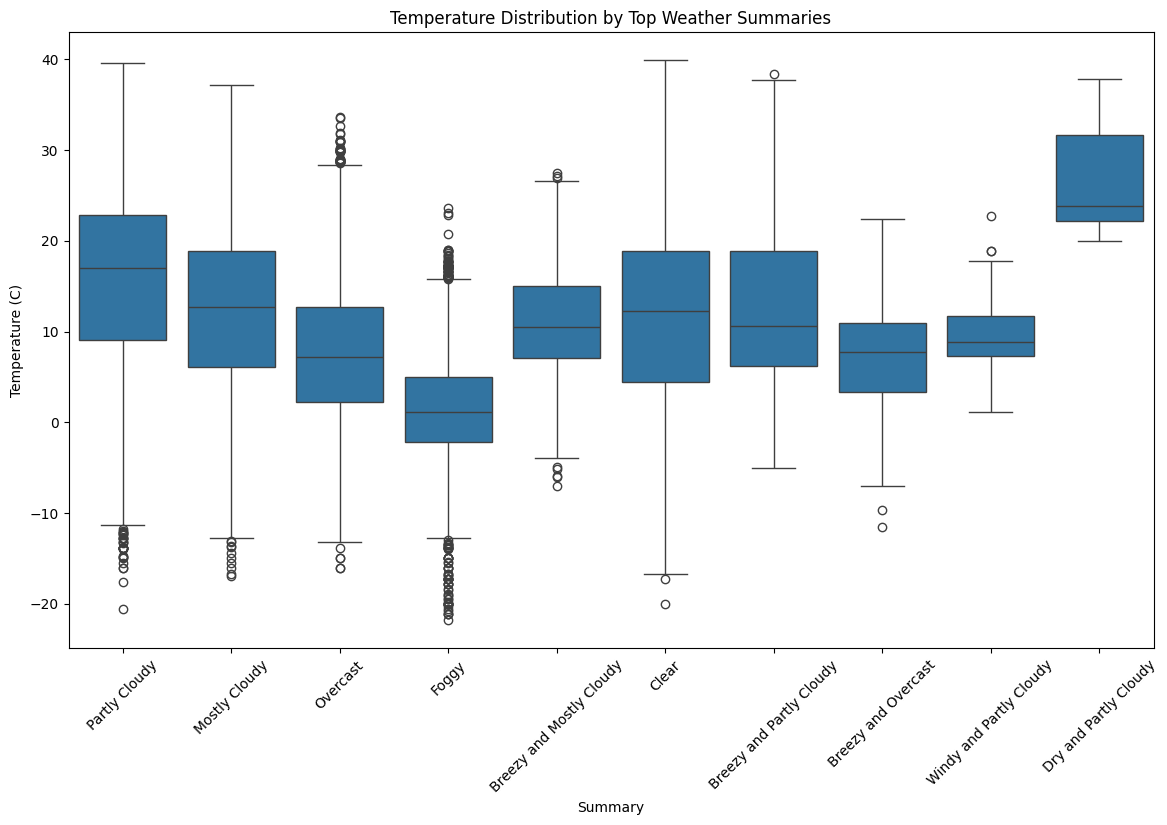

In [284]:
top_summaries = df['Summary'].value_counts().head(10).index
filtered_df = df[df['Summary'].isin(top_summaries)]

plt.figure(figsize=(14, 8))
sns.boxplot(data=filtered_df, x="Summary", y="Temperature (C)")
plt.xticks(rotation=45)
plt.title("Temperature Distribution by Top Weather Summaries")
plt.show()

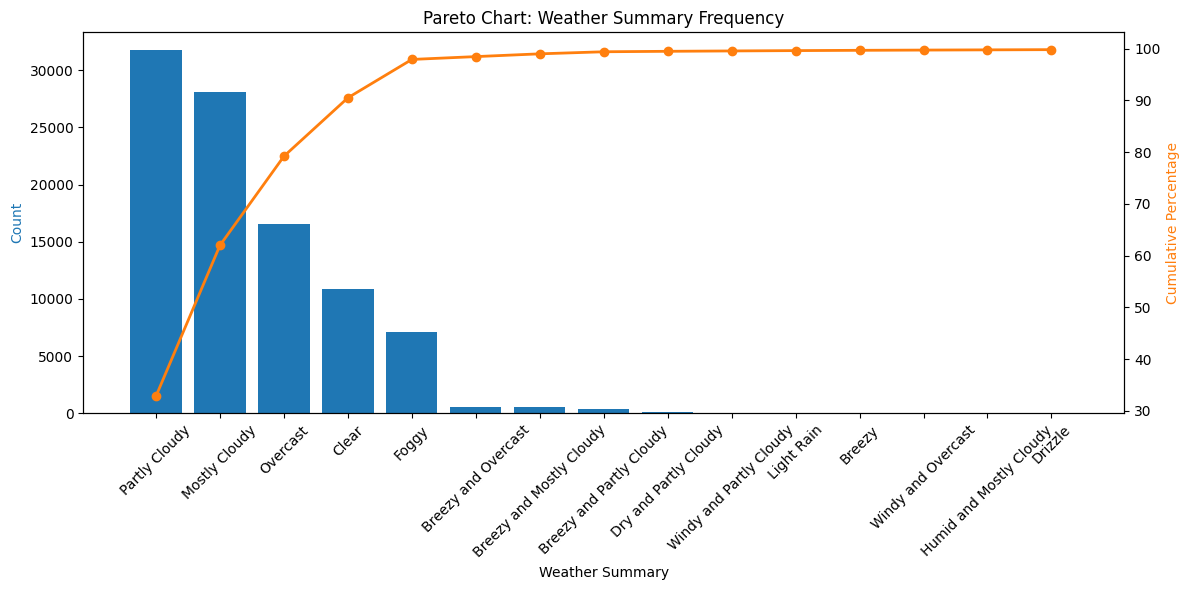

In [285]:
summary_counts = df['Summary'].value_counts()
cum_percent = summary_counts.cumsum() / summary_counts.sum() * 100

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot
ax1.bar(summary_counts.index[:15], summary_counts.values[:15], color='C0', label='Count')
ax1.set_xlabel('Weather Summary')
ax1.set_ylabel('Count', color='C0')
ax1.tick_params(axis='x', rotation=45)

# Cumulative % line
ax2 = ax1.twinx()
ax2.plot(summary_counts.index[:15], cum_percent[:15], color='C1', marker='o', linestyle='-', linewidth=2, label='Cumulative %')
ax2.set_ylabel('Cumulative Percentage', color='C1')

plt.title('Pareto Chart: Weather Summary Frequency')
fig.tight_layout()
plt.show()

In [286]:
# transform

df['Summary_encoded'] = df.groupby('Summary')["Temperature (C)"].transform("mean")

In [287]:
df['Summary_encoded'].value_counts(ascending=False)

,count
Summary_encoded,
16.024782,31733
12.629334,28094
7.516502,16597
11.925109,10890
1.464035,7148
7.241614,528
11.093411,516
12.492761,386
26.605749,86


/tmp/ipython-input-3078354904.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x="Summary_encoded", y="Temperature (C)", palette="Set2")


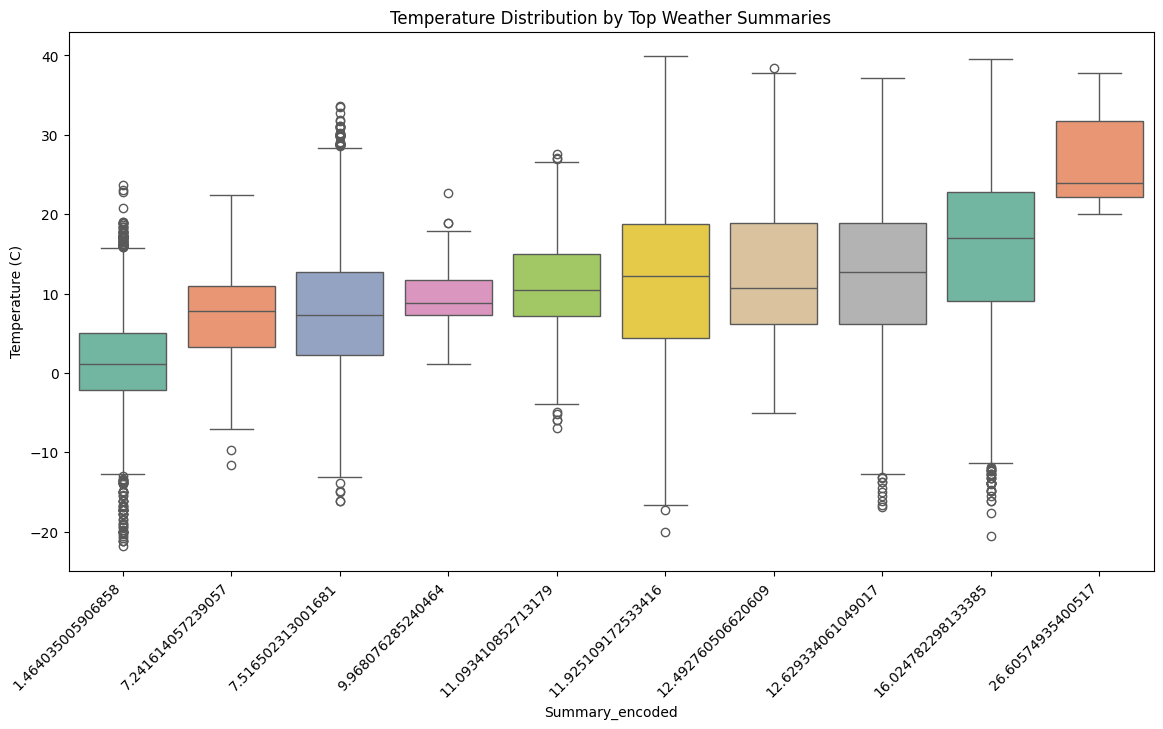

In [288]:
top_summaries = df['Summary_encoded'].value_counts().head(10).index
filtered_df = df[df['Summary_encoded'].isin(top_summaries)]

plt.figure(figsize=(14,7))
sns.boxplot(data=filtered_df, x="Summary_encoded", y="Temperature (C)", palette="Set2")
plt.xticks(rotation=45, ha="right")
plt.title("Temperature Distribution by Top Weather Summaries")
plt.show()


In [289]:
df.drop('Summary', axis=1, inplace=True)

In [290]:
df.sample(5)

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year,Month,Day,Hour,Summary_encoded
Formatted Date,,,,,,,,,,,,,,,
2007-09-12 11:00:00+00:00,rain,17.311111,17.311111,0.58,26.9836,301.0,11.2700,0.0,1017.64,Partly cloudy starting in the morning continui...,2007,9,12,11,12.629334
2010-05-27 10:00:00+00:00,rain,26.061111,26.061111,0.47,21.7350,260.0,11.2700,0.0,1009.54,Partly cloudy throughout the day.,2010,5,27,10,16.024782
2012-09-09 12:00:00+00:00,rain,28.705556,27.772222,0.32,15.6814,16.0,10.3523,0.0,1019.36,Partly cloudy starting overnight continuing un...,2012,9,9,12,16.024782
2006-01-05 00:00:00+00:00,rain,2.633333,2.633333,0.96,2.6887,325.0,2.4794,0.0,1020.86,Foggy in the morning.,2006,1,5,0,1.464035
2008-06-30 01:00:00+00:00,rain,18.800000,18.800000,0.87,3.1556,172.0,15.8263,0.0,1018.05,Partly cloudy starting in the morning.,2008,6,30,1,11.925109


# Precip Type

* Has missing values → fill with "Unknown" or the mode.

* Treat as Categorical (Rain/Snow/Unknown).

In [291]:
df['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

In [292]:
df['Precip Type'].value_counts(dropna=False)

,count
Precip Type,
rain,85224
snow,10712
NaN,517


In [293]:
# Drop rows where Precip Type is NaN
df = df.dropna(subset=['Precip Type']).copy()

df.reset_index(drop=True, inplace=True)

# Check distribution
print(df['Precip Type'].value_counts())
print("NaN values dropped. New shape:", df.shape)


Precip Type
rain    85224
snow    10712
Name: count, dtype: int64
NaN values dropped. New shape: (95936, 15)


In [294]:
# df = pd.get_dummies(df, columns=['Precip Type'], drop_first=True)
df['Precip Type Encoded'] = df['Precip Type'].map({'rain': 0, 'snow': 1})



In [295]:
df.drop('Precip Type', axis=1, inplace=True)

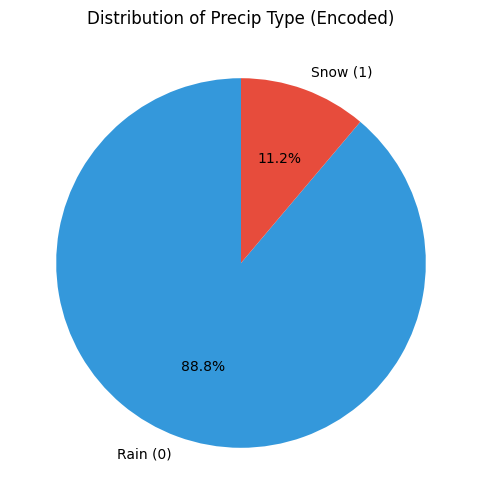

In [296]:
# Value counts
counts = df['Precip Type Encoded'].value_counts().sort_index()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(
    counts.values,
    labels=["Rain (0)", "Snow (1)"],
    autopct='%1.1f%%',
    startangle=90,
    colors=["#3498db", "#e74c3c"]
)
plt.title("Distribution of Precip Type (Encoded)")
plt.show()


In [297]:
df.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year,Month,Day,Hour,Summary_encoded,Precip Type Encoded
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006,3,31,22,16.024782,0
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006,3,31,23,16.024782,0
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006,4,1,0,12.629334,0
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006,4,1,1,16.024782,0
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006,4,1,2,12.629334,0


# Temperature (C)

* This is the Target variable (what we want to predict).

* Don’t scale unless the model specifically requires it.

In [298]:
df['Temperature (C)'].describe()

,Temperature (C)
count,95936.000000
mean,11.940976
std,9.570671
min,-21.822222
25%,4.604167
50%,12.033333
75%,18.844444
max,39.905556


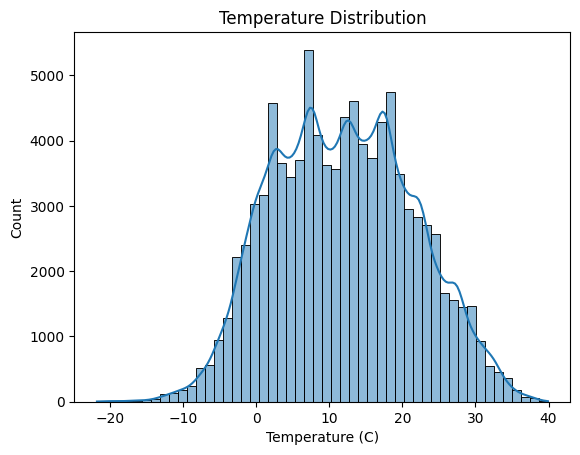

In [299]:
sns.histplot(df["Temperature (C)"], kde=True, bins=50)
plt.title("Temperature Distribution")
plt.show()

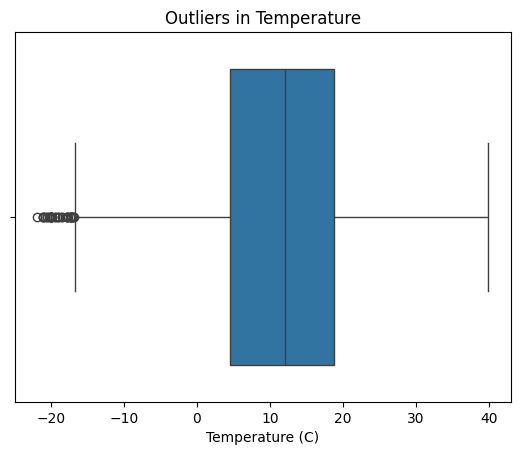

In [300]:
sns.boxplot(x=df["Temperature (C)"])
plt.title("Outliers in Temperature")
plt.show()

### Feature Engineering

* Temperature Categories (binning into Cold, Mild, Hot)

In [301]:
# df["Temp_Category"] = pd.cut(df["Temperature (C)"], bins=[-20, 0, 15, 30, 50], labels=["Freezing", "Cold", "Mild", "Hot"])


In [302]:
df.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year,Month,Day,Hour,Summary_encoded,Precip Type Encoded
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006,3,31,22,16.024782,0
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006,3,31,23,16.024782,0
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006,4,1,0,12.629334,0
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006,4,1,1,16.024782,0
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006,4,1,2,12.629334,0


# Apparent Temperature (C)

* Useful feature, but highly correlated with Target.

* May cause multicollinearity → test model performance with and without it.

In [303]:
df[["Temperature (C)", "Apparent Temperature (C)"]].describe()

,Temperature (C),Apparent Temperature (C)
count,95936.000000,95936.000000
mean,11.940976,10.862531
std,9.570671,10.717812
min,-21.822222,-27.716667
25%,4.604167,2.276389
50%,12.033333,12.033333
75%,18.844444,18.844444
max,39.905556,39.344444


In [304]:
df[["Temperature (C)", "Apparent Temperature (C)"]].corr()


,Temperature (C),Apparent Temperature (C)
Temperature (C),1.000000,0.992637
Apparent Temperature (C),0.992637,1.000000


## Multicollinearity   (:




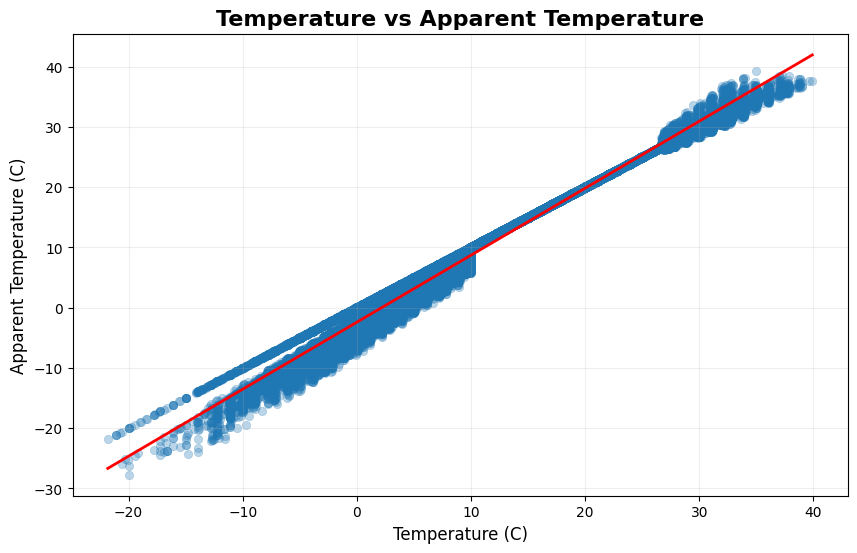

In [305]:
plt.figure(figsize=(10,6))

# Scatterplot with regression line
sns.scatterplot(
    x="Temperature (C)",
    y="Apparent Temperature (C)",
    data=df,
    alpha=0.3,
    edgecolor=None
)

# Add regression line
sns.regplot(
    x="Temperature (C)",
    y="Apparent Temperature (C)",
    data=df,
    scatter=False,
    color="red",
    line_kws={"linewidth":2}
)

plt.title("Temperature vs Apparent Temperature", fontsize=16, fontweight="bold")
plt.xlabel("Temperature (C)", fontsize=12)
plt.ylabel("Apparent Temperature (C)", fontsize=12)
plt.grid(alpha=0.2)
plt.show()

## Solutions

1. Dimensionality Reduction (PCA)

2. Regularization (if using regression)

3. Drop Redundant Features

4. Variance Inflation Factor (VIF) Analysis

In [306]:
# pass

In [307]:
df.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year,Month,Day,Hour,Summary_encoded,Precip Type Encoded
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006,3,31,22,16.024782,0
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006,3,31,23,16.024782,0
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006,4,1,0,12.629334,0
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006,4,1,1,16.024782,0
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006,4,1,2,12.629334,0


# Humidity

* Numeric (0–1).

* Very important predictor.

* Check for anomalies outside [0, 1].

In [308]:
df['Humidity'].sample(5)

,Humidity
4092,0.34
70815,0.46
18749,0.86
6096,0.93
35078,0.32


In [309]:
df['Humidity'].describe()

,Humidity
count,95936.000000
mean,0.734841
std,0.195724
min,0.000000
25%,0.600000
50%,0.780000
75%,0.890000
max,1.000000


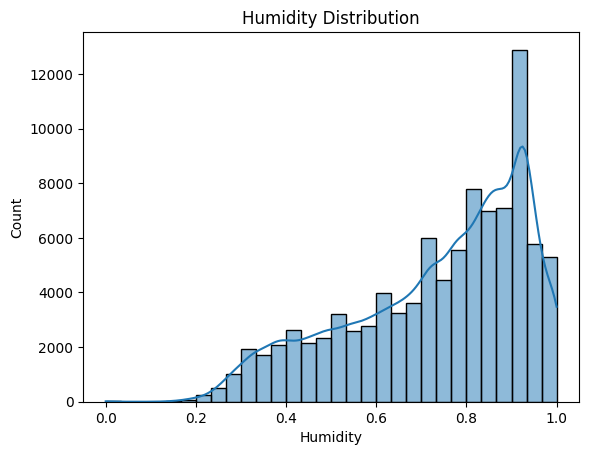

In [310]:
sns.histplot(df['Humidity'], bins=30, kde=True)
plt.title("Humidity Distribution")
plt.show()

### Feature Engineering

In [311]:
df['Humidity_Binary'] = (df['Humidity'] >= 0.5).astype(int)


In [312]:
# df['Humidity_Level'] = pd.cut(df['Humidity'],
#                               bins=[0, 0.3, 0.6, 1.0],
#                               labels=['Low', 'Medium', 'High'])

In [313]:
df.drop('Humidity', axis=1, inplace=True)

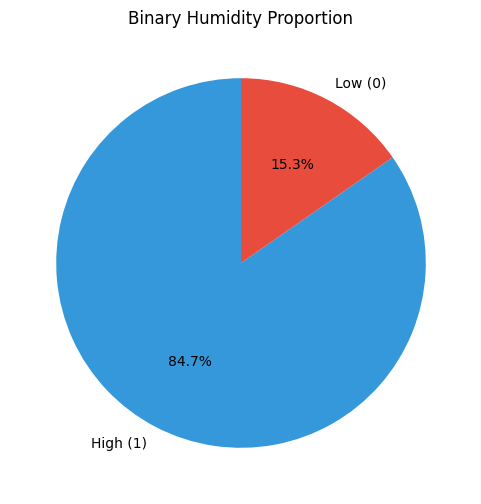

In [314]:
plt.figure(figsize=(6,6))
df['Humidity_Binary'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    labels=['High (1)', 'Low (0)'],
    colors=['#3498db', '#e74c3c']
)
plt.title("Binary Humidity Proportion")
plt.ylabel("")
plt.show()

In [315]:
df.head()

,Temperature (C),Apparent Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year,Month,Day,Hour,Summary_encoded,Precip Type Encoded,Humidity_Binary
0,9.472222,7.388889,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006,3,31,22,16.024782,0,1
1,9.355556,7.227778,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006,3,31,23,16.024782,0,1
2,9.377778,9.377778,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006,4,1,0,12.629334,0,1
3,8.288889,5.944444,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006,4,1,1,16.024782,0,1
4,8.755556,6.977778,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006,4,1,2,12.629334,0,1


#Wind Speed (km/h)

* Numeric.

* Keep as a feature.

* Watch for extreme outliers → consider scaling or clipping.

In [316]:
df['Wind Speed (km/h)'].describe()

,Wind Speed (km/h)
count,95936.000000
mean,10.804936
std,6.920727
min,0.000000
25%,5.796000
50%,9.933700
75%,14.135800
max,63.852600


<Axes: xlabel='Wind Speed (km/h)'>

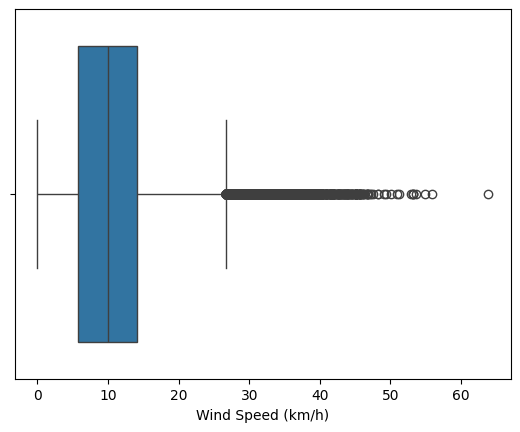

In [317]:
sns.boxplot(x=df['Wind Speed (km/h)'])


### Feature Engineering

In [318]:
# df['Wind_Category'] = pd.cut(df['Wind Speed (km/h)'],
#                              bins=[0, 5, 20, 40, 70],
#                              labels=['Calm', 'Breeze', 'Windy', 'Strong'])


In [319]:
df.head()

,Temperature (C),Apparent Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year,Month,Day,Hour,Summary_encoded,Precip Type Encoded,Humidity_Binary
0,9.472222,7.388889,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006,3,31,22,16.024782,0,1
1,9.355556,7.227778,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006,3,31,23,16.024782,0,1
2,9.377778,9.377778,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006,4,1,0,12.629334,0,1
3,8.288889,5.944444,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006,4,1,1,16.024782,0,1
4,8.755556,6.977778,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006,4,1,2,12.629334,0,1


# Wind Bearing (degrees)

* Not useful as raw degrees (0–360).
* Convert to sin and cos for proper direction representation:


```
data['Wind_X'] = np.cos(np.deg2rad(data['Wind Bearing (degrees)']))
data['Wind_Y'] = np.sin(np.deg2rad(data['Wind Bearing (degrees)']))
```



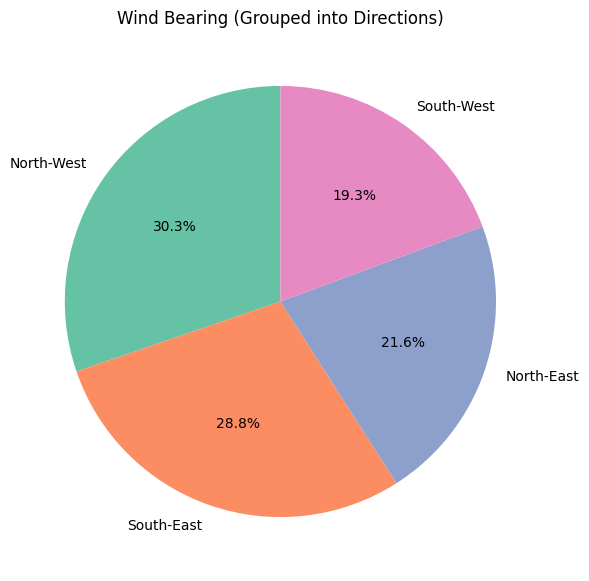

In [320]:
# Binning into 4 quadrants
bins = [0, 90, 180, 270, 360]
labels = ['North-East', 'South-East', 'South-West', 'North-West']

df['Wind_Direction'] = pd.cut(df['Wind Bearing (degrees)'], bins=bins, labels=labels, include_lowest=True)

# Count values per bin
counts = df['Wind_Direction'].value_counts()

# Pie chart
plt.figure(figsize=(7,7))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set2.colors)
plt.title("Wind Bearing (Grouped into Directions)")
plt.show()

In [321]:

df['Wind_Bearing_sin'] = np.sin(np.deg2rad(df['Wind Bearing (degrees)']))
df['Wind_Bearing_cos'] = np.cos(np.deg2rad(df['Wind Bearing (degrees)']))


### Binning Wind Bearing


In [322]:
# bins = [0, 90, 180, 270, 360]
# labels = ['North-East', 'South-East', 'South-West', 'North-West']
# df['Wind_Bearing_bin'] = pd.cut(df['Wind Bearing (degrees)'], bins=bins, labels=labels, include_lowest=True)

# # Apply One-Hot Encoding
# df_encoded = pd.get_dummies(df, columns=['Wind_Bearing_bin'], prefix='WindDir')

# # Show new columns
# print(df_encoded.filter(like='WindDir').head())

In [323]:
df.drop('Wind Bearing (degrees)', axis=1, inplace=True)

In [324]:
df.head()

,Temperature (C),Apparent Temperature (C),Wind Speed (km/h),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year,Month,Day,Hour,Summary_encoded,Precip Type Encoded,Humidity_Binary,Wind_Direction,Wind_Bearing_sin,Wind_Bearing_cos
0,9.472222,7.388889,14.1197,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006,3,31,22,16.024782,0,1,South-West,-0.945519,-0.325568
1,9.355556,7.227778,14.2646,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006,3,31,23,16.024782,0,1,South-West,-0.981627,-0.190809
2,9.377778,9.377778,3.9284,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006,4,1,0,12.629334,0,1,South-West,-0.406737,-0.913545
3,8.288889,5.944444,14.1036,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006,4,1,1,16.024782,0,1,South-West,-0.999848,-0.017452
4,8.755556,6.977778,11.0446,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006,4,1,2,12.629334,0,1,South-West,-0.981627,-0.190809


# Visibility (km)

* Numeric, useful especially in foggy conditions.

* Keep as is.

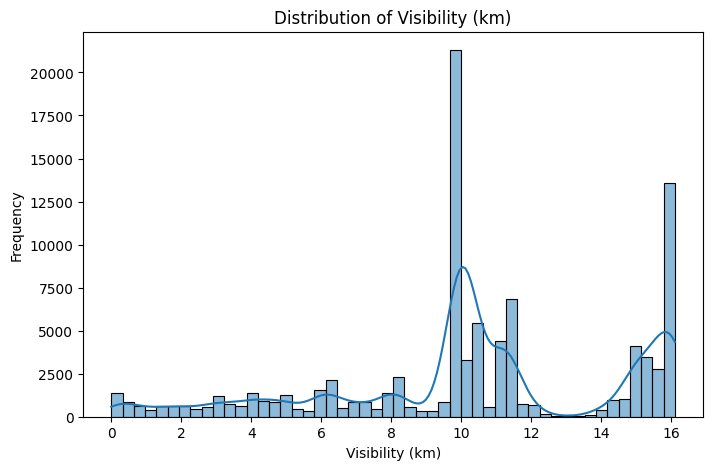

In [325]:
plt.figure(figsize=(8,5))
sns.histplot(df['Visibility (km)'], bins=50, kde=True)
plt.title("Distribution of Visibility (km)")
plt.xlabel("Visibility (km)")
plt.ylabel("Frequency")
plt.show()

In [326]:
# bins = [0, 5, 10, 20]
# labels = ['Low', 'Medium', 'High']
# df['Visibility_Category'] = pd.cut(df['Visibility (km)'], bins=bins, labels=labels, include_lowest=True)

# Loud Cover

* Almost always 0 → no information.

* Drop this column.

In [327]:
df.drop('Loud Cover', axis=1, inplace=True)

# Pressure (millibars)

* Numeric, very relevant (air pressure affects weather patterns).

* Keep as a feature.

In [328]:
df['Pressure (millibars)'].head()

,Pressure (millibars)
0,1015.13
1,1015.63
2,1015.94
3,1016.41
4,1016.51


In [329]:
print(df['Pressure (millibars)'].describe())


count    95936.000000
mean      1003.150038
std        117.276976
min          0.000000
25%       1011.890000
50%       1016.420000
75%       1021.050000
max       1046.380000
Name: Pressure (millibars), dtype: float64


In [ ]:
pressure_before = df['Pressure (millibars)'].copy()

df['Pressure (millibars)'] = df['Pressure (millibars)'].replace(0, np.nan)

df['Pressure (millibars)'].fillna(df['Pressure (millibars)'].median(), inplace=True)

df['Pressure (millibars)'] = df['Pressure (millibars)'].clip(lower=970, upper=1055)

pressure_after = df['Pressure (millibars)']

/tmp/ipython-input-3257109194.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Pressure (millibars)'].fillna(df['Pressure (millibars)'].median(), inplace=True)


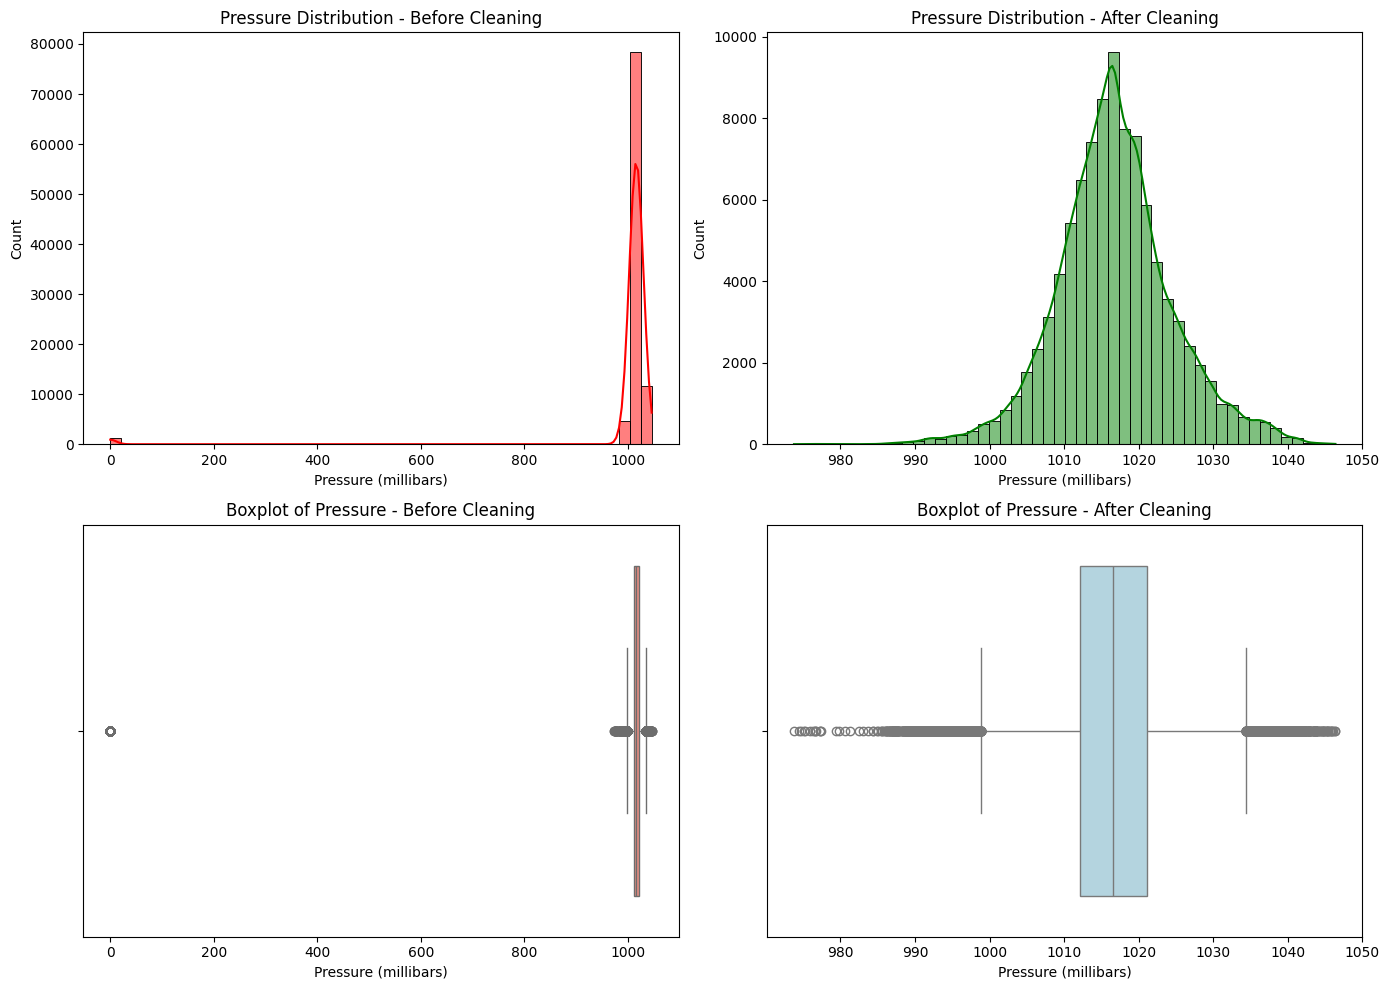

In [330]:
fig, axs = plt.subplots(2, 2, figsize=(14,10))

sns.histplot(pressure_before, bins=50, kde=True, color="red", ax=axs[0,0])
axs[0,0].set_title("Pressure Distribution - Before Cleaning")

sns.histplot(pressure_after, bins=50, kde=True, color="green", ax=axs[0,1])
axs[0,1].set_title("Pressure Distribution - After Cleaning")

sns.boxplot(x=pressure_before, color="salmon", ax=axs[1,0])
axs[1,0].set_title("Boxplot of Pressure - Before Cleaning")

sns.boxplot(x=pressure_after, color="lightblue", ax=axs[1,1])
axs[1,1].set_title("Boxplot of Pressure - After Cleaning")

plt.tight_layout()
plt.show()

In [334]:
# plt.figure(figsize=(8,5))
# sns.violinplot(x=df['Pressure (millibars)'], color="skyblue")
# plt.title("Violin Plot of Pressure (millibars)")
# plt.show()


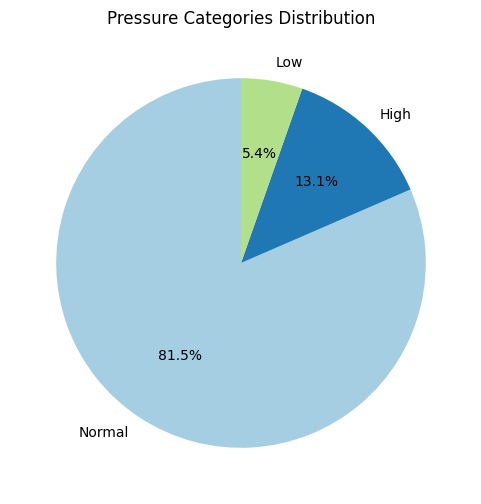

In [335]:
bins = [970, 1005, 1025, 1055]
labels = ['Low', 'Normal', 'High']
df['Pressure_Category'] = pd.cut(df['Pressure (millibars)'], bins=bins, labels=labels, include_lowest=True)

counts = df['Pressure_Category'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=90)
plt.title("Pressure Categories Distribution")
plt.show()


In [332]:
df.head()

,Temperature (C),Apparent Temperature (C),Wind Speed (km/h),Visibility (km),Pressure (millibars),Year,Month,Day,Hour,Summary_encoded,Precip Type Encoded,Humidity_Binary,Wind_Direction,Wind_Bearing_sin,Wind_Bearing_cos
0,9.472222,7.388889,14.1197,15.8263,1015.13,2006,3,31,22,16.024782,0,1,South-West,-0.945519,-0.325568
1,9.355556,7.227778,14.2646,15.8263,1015.63,2006,3,31,23,16.024782,0,1,South-West,-0.981627,-0.190809
2,9.377778,9.377778,3.9284,14.9569,1015.94,2006,4,1,0,12.629334,0,1,South-West,-0.406737,-0.913545
3,8.288889,5.944444,14.1036,15.8263,1016.41,2006,4,1,1,16.024782,0,1,South-West,-0.999848,-0.017452
4,8.755556,6.977778,11.0446,15.8263,1016.51,2006,4,1,2,12.629334,0,1,South-West,-0.981627,-0.190809


# Daily Summary

* Long text description, not practical for simple regression.

* Could be used with NLP (TF-IDF, embeddings) in advanced setups.

* For now, safe to drop for simplicity.

In [331]:
df.drop('Daily Summary', axis=1, inplace=True)



---



In [353]:
df.columns


Index(['Temperature (C)', 'Apparent Temperature (C)', 'Wind Speed (km/h)',
       'Visibility (km)', 'Pressure (millibars)', 'Year', 'Month', 'Day',
       'Hour', 'Summary_encoded', 'Precip Type Encoded', 'Humidity_Binary',
       'Wind_Bearing_sin', 'Wind_Bearing_cos'],
      dtype='object')

In [351]:
df.drop(['Wind_Direction','Pressure_Category'] , axis=1, inplace=True)

In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95936 entries, 0 to 95935
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature (C)           95936 non-null  float64
 1   Apparent Temperature (C)  95936 non-null  float64
 2   Wind Speed (km/h)         95936 non-null  float64
 3   Visibility (km)           95936 non-null  float64
 4   Pressure (millibars)      95936 non-null  float64
 5   Year                      95936 non-null  int32  
 6   Month                     95936 non-null  int32  
 7   Day                       95936 non-null  int32  
 8   Hour                      95936 non-null  int32  
 9   Summary_encoded           95936 non-null  float64
 10  Precip Type Encoded       95936 non-null  int64  
 11  Humidity_Binary           95936 non-null  int64  
 12  Wind_Bearing_sin          95936 non-null  float64
 13  Wind_Bearing_cos          95936 non-null  float64
dtypes: flo

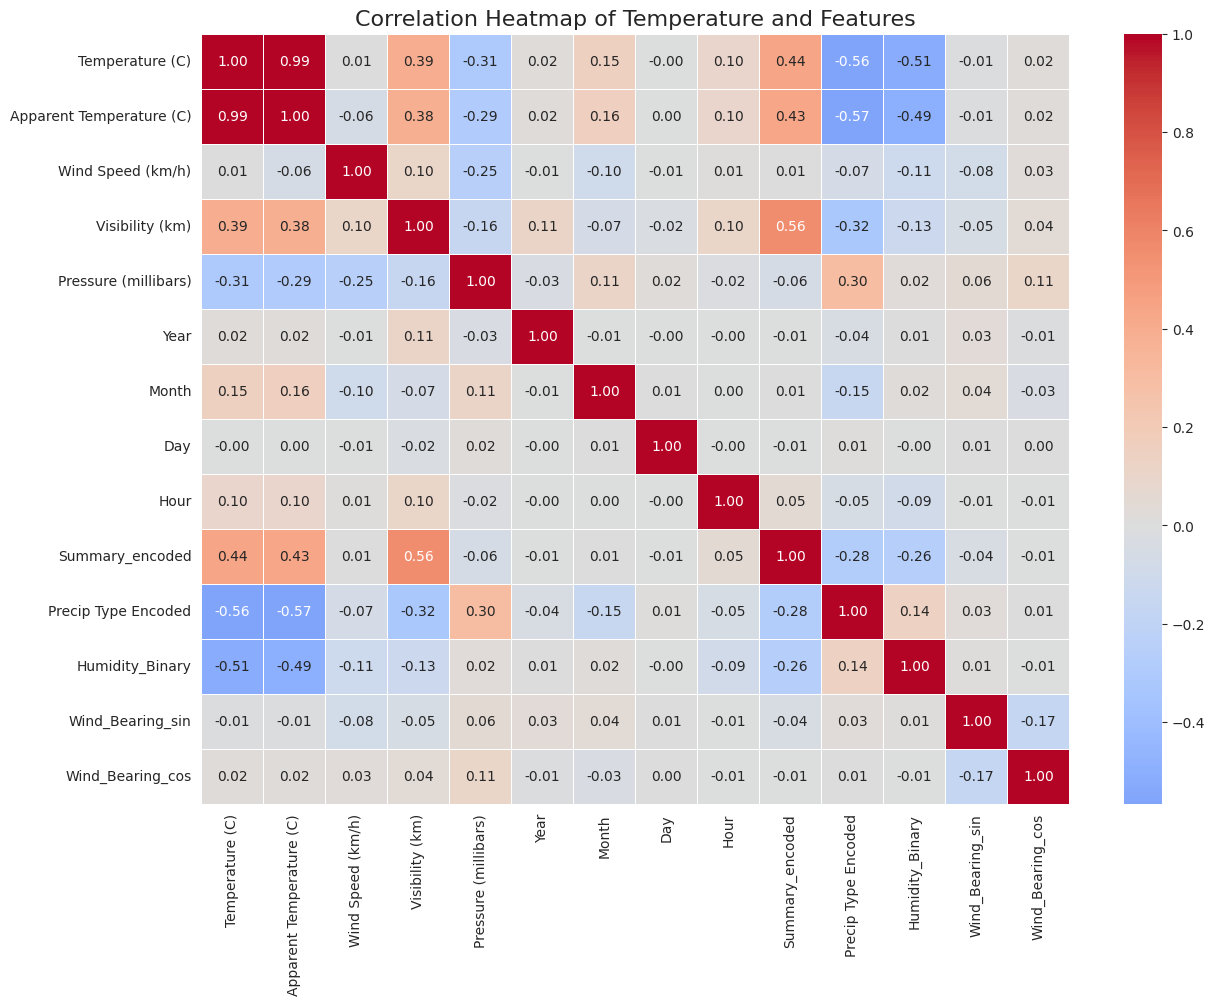

In [354]:
features = [
    'Temperature (C)', 'Apparent Temperature (C)', 'Wind Speed (km/h)',
    'Visibility (km)', 'Pressure (millibars)', 'Year', 'Month', 'Day',
    'Hour', 'Summary_encoded', 'Precip Type Encoded', 'Humidity_Binary',
    'Wind_Bearing_sin', 'Wind_Bearing_cos'
]

corr_matrix = df[features].corr()

plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, center=0)
plt.title("Correlation Heatmap of Temperature and Features", fontsize=16)
plt.show()

In [356]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

features = [
    'Apparent Temperature (C)', 'Wind Speed (km/h)',
    'Visibility (km)', 'Pressure (millibars)', 'Year', 'Month', 'Day',
    'Hour', 'Summary_encoded', 'Precip Type Encoded', 'Humidity_Binary',
    'Wind_Bearing_sin', 'Wind_Bearing_cos'
]

X = df[features]
y = df['Temperature (C)']

#  =====  Train-Test Split ====
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =====  Define Pipelines for Each Model =====
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42, n_jobs=-1)
}

pipelines = {}

for name, model in models.items():
    pipelines[name] = Pipeline([
        ('scaler', StandardScaler()),   # Feature Scaling
        ('regressor', model)
    ])

# =====  Train & Evaluate Each Model =====
results = []

for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    r2 = r2_score(y_test, y_pred)
    results.append({"Model": name, "RMSE": rmse, "R2": r2})

results_df = pd.DataFrame(results).sort_values(by="RMSE")
print(results_df)


              Model      RMSE        R2
3      RandomForest  0.142323  0.999778
5           XGBoost  0.180635  0.999642
4  GradientBoosting  0.208956  0.999521
1             Ridge  0.931621  0.990482
0  LinearRegression  0.931622  0.990481
2             Lasso  0.949722  0.990108


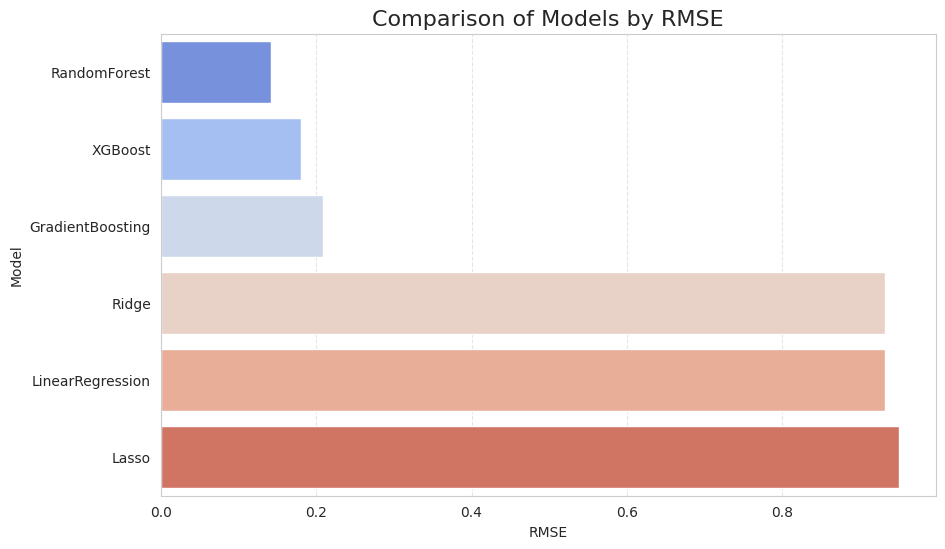

In [363]:
results_df_sorted = results_df.sort_values(by='RMSE')

plt.figure(figsize=(10,6))
sns.barplot(
    x='RMSE',
    y='Model',
    data=results_df_sorted,
    hue='Model',
    dodge=False,
    palette='coolwarm',
    legend=False
)

plt.title("Comparison of Models by RMSE", fontsize=16)
plt.xlabel("RMSE")
plt.ylabel("Model")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


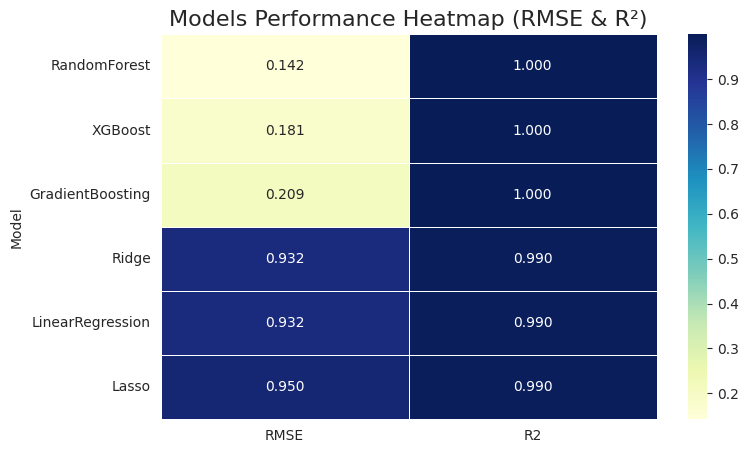

In [362]:
heatmap_data = results_df.set_index('Model')[['RMSE','R2']]
plt.figure(figsize=(8,5))
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap='YlGnBu', linewidths=0.5)
plt.title("Models Performance Heatmap (RMSE & R²)", fontsize=16)
plt.show()